In [262]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [263]:
df= pd.read_csv("hasil_training_glcm.csv")
df

,label,R,G,B,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,...,contrast 90,contrast 135,ASM 0,ASM 45,ASM 90,ASM 135,energy 0,energy 45,energy 90,energy 135
0,1,163.668286,159.143344,153.407620,1.312389,1.352488,1.296728,1.347625,0.986683,0.985132,...,4.396916,5.019011,0.006268,0.006196,0.006367,0.006144,0.079168,0.078715,0.079794,0.078384
1,1,163.668286,159.143344,153.407620,1.296728,1.347625,1.312389,1.352488,0.988292,0.986650,...,4.997549,5.589769,0.006367,0.006144,0.006268,0.006196,0.079794,0.078384,0.079168,0.078715
2,1,161.508843,157.070631,150.337493,1.171236,1.206727,1.170358,1.218439,0.990553,0.989018,...,3.878913,4.153030,0.006563,0.006512,0.006661,0.006418,0.081014,0.080699,0.081614,0.080114
3,1,161.508843,157.070631,150.337493,1.170358,1.218439,1.171236,1.206727,0.990846,0.990208,...,3.998134,4.657992,0.006661,0.006418,0.006563,0.006512,0.081614,0.080114,0.081014,0.080699
4,1,177.856320,173.252455,165.452310,1.285804,1.319004,1.289307,1.340330,0.990833,0.990058,...,4.200837,4.706435,0.005480,0.005426,0.005537,0.005355,0.074024,0.073664,0.074408,0.073180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,169.191884,165.520523,176.400802,2.357693,2.431681,2.243196,2.522420,0.986983,0.988218,...,27.721798,43.872403,0.007628,0.006840,0.006789,0.006908,0.087337,0.082707,0.082395,0.083114
140,2,181.603422,179.579582,179.288434,2.403563,2.418338,2.037310,2.380426,0.978099,0.977329,...,38.379555,52.568939,0.011887,0.011433,0.011586,0.011404,0.109026,0.106927,0.107638,0.106788
141,2,173.840105,169.563997,176.360203,2.191764,2.281003,2.059063,2.287900,0.988626,0.988703,...,18.442860,26.879790,0.007178,0.006474,0.006424,0.006502,0.084723,0.080464,0.080148,0.080635
142,2,174.825724,171.558157,178.543833,2.151302,2.273251,2.039601,2.256329,0.987893,0.987636,...,17.401605,26.065463,0.007042,0.006349,0.006303,0.006382,0.083918,0.079679,0.079393,0.079888


In [264]:
x = df.drop(columns="label",axis=1)
y = df['label']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=None)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((115, 27), (29, 27), (115,), (29,))

In [265]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit (x_train, y_train)

KNeighborsClassifier()

In [266]:
predictions = knn.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        15
           2       1.00      0.71      0.83        14

    accuracy                           0.86        29
   macro avg       0.89      0.86      0.86        29
weighted avg       0.89      0.86      0.86        29



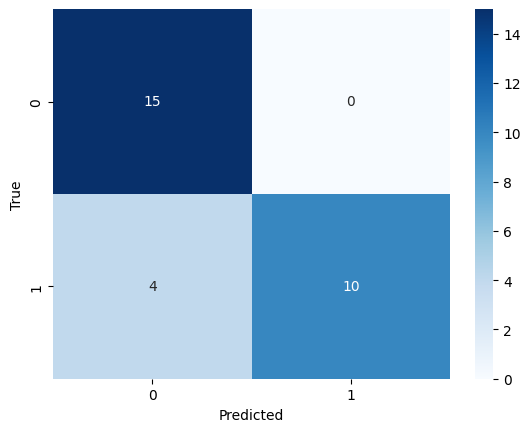

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [268]:
dt = pd.read_csv("hasil_Testing_glcm.csv")
x_pred = dt.drop('label',axis=1)
y_true = dt['label']

x_pred

,R,G,B,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,contrast 90,contrast 135,ASM 0,ASM 45,ASM 90,ASM 135,energy 0,energy 45,energy 90,energy 135
0,214.693944,207.094619,197.097243,2.420384,2.482295,2.375853,2.482833,0.986815,0.986241,0.987119,...,14.777865,17.065414,0.002691,0.002613,0.002714,0.002629,0.051875,0.051121,0.052094,0.051269
1,174.184561,169.930272,161.983465,1.125891,1.145122,1.071798,1.141482,0.989928,0.989374,0.990955,...,3.929181,4.758150,0.007972,0.007865,0.008193,0.007916,0.089284,0.088683,0.090514,0.088970
2,174.827559,171.168447,161.357456,1.219105,1.256911,1.187848,1.238125,0.988050,0.986479,0.988576,...,4.200680,4.767562,0.006698,0.006554,0.006776,0.006627,0.081844,0.080956,0.082319,0.081405
3,196.629699,194.605512,184.081622,1.609072,1.633261,1.488927,1.611947,0.965636,0.965809,0.978096,...,15.846102,22.355625,0.005654,0.005521,0.005597,0.005522,0.075194,0.074305,0.074811,0.074308
4,173.409127,170.493402,160.901419,1.251109,1.299278,1.237402,1.275431,0.987768,0.986216,0.987689,...,4.084038,4.408907,0.006139,0.005953,0.006134,0.006030,0.078352,0.077154,0.078322,0.077650
5,224.174582,216.271655,207.525929,2.912702,2.969013,2.874992,2.991334,0.979658,0.978972,0.979939,...,20.620074,23.600383,0.002637,0.002572,0.002646,0.002581,0.051353,0.050715,0.051437,0.050806
6,181.018845,179.305340,167.619114,1.753847,1.808636,1.619231,1.747115,0.973408,0.970824,0.981994,...,20.514654,26.278651,0.004639,0.004535,0.004618,0.004527,0.068110,0.067344,0.067952,0.067283
7,184.105002,184.332390,175.416638,1.574571,1.629346,1.501304,1.602537,0.984254,0.981676,0.986598,...,12.373940,14.143208,0.004397,0.004241,0.004333,0.004259,0.066309,0.065124,0.065824,0.065262
8,167.673061,167.179374,170.691945,1.761650,1.906510,1.825220,1.910032,0.992260,0.991303,0.992842,...,9.276820,11.182518,0.006768,0.006111,0.006045,0.006113,0.082265,0.078170,0.077751,0.078189
9,219.148487,212.927356,203.586335,2.469485,2.538289,2.430208,2.538517,0.986368,0.985716,0.986975,...,14.086076,16.358529,0.002523,0.002450,0.002545,0.002467,0.050233,0.049493,0.050450,0.049664


In [269]:
y_pred = knn.predict(x_pred)
y_pred

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2],
      dtype=int64)

In [270]:
x_pred["label"]= knn.predict(x_pred)
x_pred

,R,G,B,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,contrast 135,ASM 0,ASM 45,ASM 90,ASM 135,energy 0,energy 45,energy 90,energy 135,label
0,214.693944,207.094619,197.097243,2.420384,2.482295,2.375853,2.482833,0.986815,0.986241,0.987119,...,17.065414,0.002691,0.002613,0.002714,0.002629,0.051875,0.051121,0.052094,0.051269,1
1,174.184561,169.930272,161.983465,1.125891,1.145122,1.071798,1.141482,0.989928,0.989374,0.990955,...,4.758150,0.007972,0.007865,0.008193,0.007916,0.089284,0.088683,0.090514,0.088970,1
2,174.827559,171.168447,161.357456,1.219105,1.256911,1.187848,1.238125,0.988050,0.986479,0.988576,...,4.767562,0.006698,0.006554,0.006776,0.006627,0.081844,0.080956,0.082319,0.081405,1
3,196.629699,194.605512,184.081622,1.609072,1.633261,1.488927,1.611947,0.965636,0.965809,0.978096,...,22.355625,0.005654,0.005521,0.005597,0.005522,0.075194,0.074305,0.074811,0.074308,2
4,173.409127,170.493402,160.901419,1.251109,1.299278,1.237402,1.275431,0.987768,0.986216,0.987689,...,4.408907,0.006139,0.005953,0.006134,0.006030,0.078352,0.077154,0.078322,0.077650,1
5,224.174582,216.271655,207.525929,2.912702,2.969013,2.874992,2.991334,0.979658,0.978972,0.979939,...,23.600383,0.002637,0.002572,0.002646,0.002581,0.051353,0.050715,0.051437,0.050806,1
6,181.018845,179.305340,167.619114,1.753847,1.808636,1.619231,1.747115,0.973408,0.970824,0.981994,...,26.278651,0.004639,0.004535,0.004618,0.004527,0.068110,0.067344,0.067952,0.067283,2
7,184.105002,184.332390,175.416638,1.574571,1.629346,1.501304,1.602537,0.984254,0.981676,0.986598,...,14.143208,0.004397,0.004241,0.004333,0.004259,0.066309,0.065124,0.065824,0.065262,2
8,167.673061,167.179374,170.691945,1.761650,1.906510,1.825220,1.910032,0.992260,0.991303,0.992842,...,11.182518,0.006768,0.006111,0.006045,0.006113,0.082265,0.078170,0.077751,0.078189,1
9,219.148487,212.927356,203.586335,2.469485,2.538289,2.430208,2.538517,0.986368,0.985716,0.986975,...,16.358529,0.002523,0.002450,0.002545,0.002467,0.050233,0.049493,0.050450,0.049664,1


In [271]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.65
